In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib as mpl

In [2]:
sc.set_figure_params(dpi=100)

In [3]:
adata = sc.read("../data/CART_fulldataset_clustered.h5ad")

In [4]:
adata = adata[adata.obs['cell_type'].str.match('.*T$')]

In [10]:
adata.obs['sample']=adata.obs['barcode'].astype(str) + '-' + adata.obs['timepoint'].astype(str)

/tmp/ipykernel_7419/2560969599.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['sample']=adata.obs['barcode'].astype(str) + '-' + adata.obs['timepoint'].astype(str)


In [12]:
# Require at least 50 T-cells to use sample
min_cells= 50

ncell = adata.obs['sample'].value_counts()

samp_use = ncell.index[ncell>=min_cells]

In [13]:
adata = adata[adata.obs['sample'].isin(samp_use)]

In [14]:
adata.obs[['CD45RO','CD45RA']]=pd.read_csv('../data/CD45iso_estimates.csv',index_col=0)

/tmp/ipykernel_7419/1241504568.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[['CD45RO','CD45RA']]=pd.read_csv('../data/CD45iso_estimates.csv',index_col=0)


Naive: CCR7+CD45RA+

CM: CCR7+CD45RO+

EM: CCR7-CD45RO+

TEMRA: CCR7-CD45RA+

T-reg: FOXP3+


In [15]:
k=20

markers = ['CD45RO','CD45RA','CCR7','FOXP3','CD4','CD8A','CD3D','Kymriah','Yescarta','NKG7','GZMK','GZMB','PRF1']


for samp,g in adata.obs.groupby('sample'):
    
    if g.shape[0]<=50:
        continue
    
    adata_sub = adata[g.index,:]
    
    npc=15
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(adata_sub.obsm['X_pca'][:,0:npc])
    distances, indices = nbrs.kneighbors(adata_sub.obsm['X_pca'][:,0:npc])

    
    
    for gene in markers:
        if gene in ['CD45RO','CD45RA']:
            adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
        else:
            adata_sub.obs['knn'+gene] = np.array(adata_sub.raw[:,gene].X[indices.reshape(-1)].\
                                             reshape(-1,k).mean(axis=1)).reshape(-1)
        adata.obs.loc[g.index,'knn'+gene] = adata_sub.obs['knn'+gene]

    

/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/43671997

/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/43671997

/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/436719975.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs['knn'+gene] = adata_sub.obs[gene].values[indices.reshape(-1)].reshape(-1,k).mean(axis=1)
/tmp/ipykernel_7419/43671997

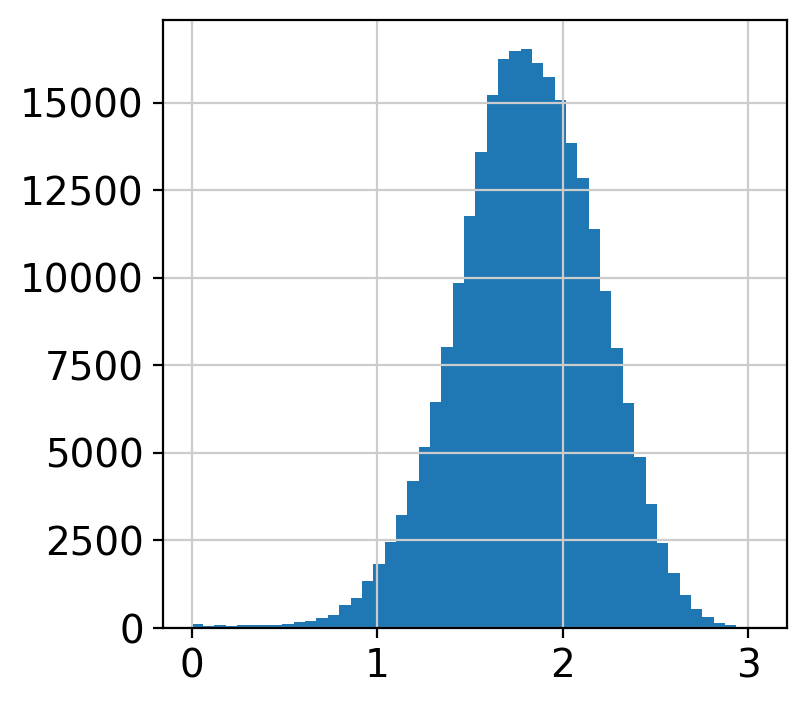

In [16]:
plt.hist(adata.obs['knnCD3D'],50);

In [17]:
adata = adata[adata.obs['knnCD3D']>.75]

## Subtype classification

In [18]:
adata.obs['subtype'] = 'Unknown'
cd8_idx = adata.obs['knnCD8A']>=.75
cd4_idx = adata.obs['knnCD4']>=.25
adata.obs.loc[cd8_idx&~cd4_idx,'subtype'] = 'CD8 T'
adata.obs.loc[cd4_idx&~cd8_idx,'subtype'] = 'CD4 T'

adata.obs['class'] = ''

RA_idx = adata.obs['knnCD45RA']>=.5
CCR7_idx = adata.obs['knnCCR7']>=.5
cytotoxic_idx = adata.obs['knnNKG7']>=1
treg_idx = adata.obs['knnFOXP3']>=.75

adata.obs.loc[RA_idx,'class'] = 'EMRA'
adata.obs.loc[RA_idx&CCR7_idx,'class'] = 'Naive'
adata.obs.loc[~RA_idx&CCR7_idx,'class'] = 'CM'
adata.obs.loc[~RA_idx&~CCR7_idx,'class'] = 'EM'

# CD4-specific classifications
adata.obs.loc[cd4_idx&treg_idx,'class'] = 'T-reg'
adata.obs.loc[cd4_idx&cytotoxic_idx,'class'] = 'CD4+ CTL'


/tmp/ipykernel_7419/2385221618.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['subtype'] = 'Unknown'


In [19]:
adata.obs.to_csv('../data/ALLT_subtypes_annotated_obs.txt',sep='\t')